<a href="https://colab.research.google.com/github/SahilSunda/ML_Project/blob/master/New_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D,BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, Activation
from keras.layers.merge import concatenate
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [ ]:
!unzip /content/drive/MyDrive/khetipoint.zip

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(256,kernel_size=3,activation='relu'))
model.add(Conv2D(512,kernel_size=3,activation='relu'))
model.add(Conv2D(512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(38,activation='softmax'))

In [ ]:
model.build((None,224,224,3))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_11 (ModuleWra (None, 222, 222, 64)      1792      
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 111, 111, 64)      0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 109, 109, 128)     73856     
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 55, 55, 128)       0         
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 53, 53, 256)       295168    
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 51, 51, 512)       1180160   
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 49, 49, 512)      

In [ ]:
train_path = '/content/Khetipoint Data'

In [ ]:
BS=64

In [ ]:
train_batches = ImageDataGenerator(validation_split=0.2).flow_from_directory(directory=train_path,target_size=(224,224),class_mode = 'categorical',batch_size=BS,subset='training')
valid_batches = ImageDataGenerator(validation_split=0.2).flow_from_directory(directory=train_path,target_size=(224,224),class_mode = 'categorical',batch_size=BS,subset='validation')

Found 5152 images belonging to 38 classes.
Found 1288 images belonging to 38 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training = model.fit(x=train_batches,validation_data=valid_batches, epochs=15,steps_per_epoch=len(train_batches),validation_steps=len(valid_batches),verbose=1)

Epoch 1/15
81/81 [==============================] - 125s 978ms/step - loss: 15.1156 - accuracy: 0.0967 - val_loss: 3.1004 - val_accuracy: 0.1227
Epoch 2/15
81/81 [==============================] - 70s 866ms/step - loss: 3.0882 - accuracy: 0.1429 - val_loss: 2.8237 - val_accuracy: 0.1848
Epoch 3/15
81/81 [==============================] - 70s 865ms/step - loss: 2.6922 - accuracy: 0.2453 - val_loss: 2.1320 - val_accuracy: 0.4115
Epoch 4/15
81/81 [==============================] - 70s 861ms/step - loss: 2.0895 - accuracy: 0.3969 - val_loss: 1.4545 - val_accuracy: 0.6071
Epoch 5/15
81/81 [==============================] - 70s 862ms/step - loss: 1.4037 - accuracy: 0.5914 - val_loss: 1.1692 - val_accuracy: 0.6693
Epoch 6/15
81/81 [==============================] - 70s 863ms/step - loss: 0.8562 - accuracy: 0.7459 - val_loss: 0.6546 - val_accuracy: 0.8284
Epoch 7/15
81/81 [==============================] - 70s 868ms/step - loss: 0.5219 - accuracy: 0.8591 - val_loss: 0.5198 - val_accuracy: 0.84

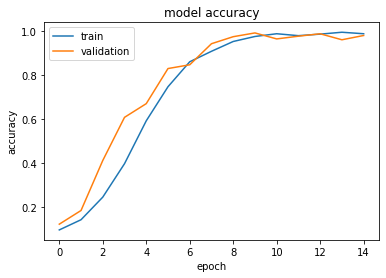

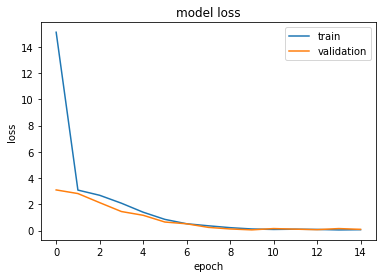

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel( 'epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()